In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ACP_Classification/ACPs_Breast_cancer.csv')
df

,ID,sequence,class
0,1,AAWKWAWAKKWAKAKKWAKAA,mod. active
1,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active
2,3,AWKKWAKAWKWAKAKWWAKAA,mod. active
3,4,ESFSDWWKLLAE,mod. active
4,5,ETFADWWKLLAE,mod. active
...,...,...,...
944,945,YLDKEVKLIKKMGNHLTNLRRVA,inactive - virtual
945,946,YLSESVETIKKLGDHITSLKKLW,inactive - virtual
946,947,YPIVDAAMRQLTETG,inactive - virtual
947,948,YQNIVKAVQYAARKLQ,inactive - virtual


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

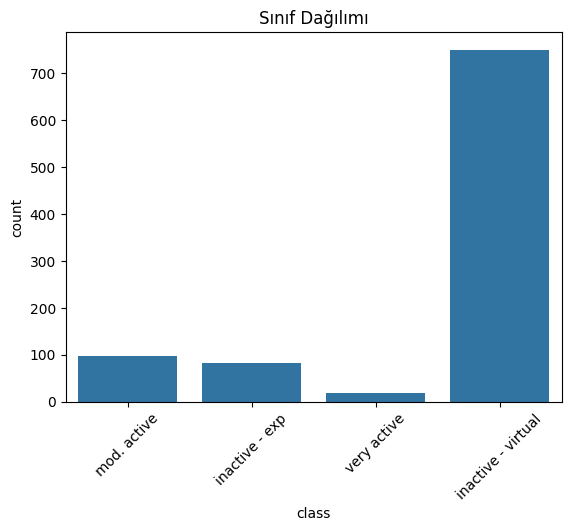

In [ ]:
sns.countplot(x='class', data=df)
plt.xticks(rotation=45)
plt.title("Sınıf Dağılımı")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()
df['class']=label_encoder.fit_transform(df['class'])

In [ ]:
df

,ID,sequence,class
0,1,AAWKWAWAKKWAKAKKWAKAA,2
1,2,AIGKFLHSAKKFGKAFVGEIMNS,2
2,3,AWKKWAKAWKWAKAKWWAKAA,2
3,4,ESFSDWWKLLAE,2
4,5,ETFADWWKLLAE,2
...,...,...,...
944,945,YLDKEVKLIKKMGNHLTNLRRVA,1
945,946,YLSESVETIKKLGDHITSLKKLW,1
946,947,YPIVDAAMRQLTETG,1
947,948,YQNIVKAVQYAARKLQ,1


In [ ]:
df['class'].unique()

array([2, 0, 3, 1])

In [ ]:
df.isnull().sum()

,0
ID,0
sequence,0
class,0


In [ ]:
df['lenght']=df['sequence'].apply(len)
df

,ID,sequence,class,lenght
0,1,AAWKWAWAKKWAKAKKWAKAA,2,21
1,2,AIGKFLHSAKKFGKAFVGEIMNS,2,23
2,3,AWKKWAKAWKWAKAKWWAKAA,2,21
3,4,ESFSDWWKLLAE,2,12
4,5,ETFADWWKLLAE,2,12
...,...,...,...,...
944,945,YLDKEVKLIKKMGNHLTNLRRVA,1,23
945,946,YLSESVETIKKLGDHITSLKKLW,1,23
946,947,YPIVDAAMRQLTETG,1,15
947,948,YQNIVKAVQYAARKLQ,1,16


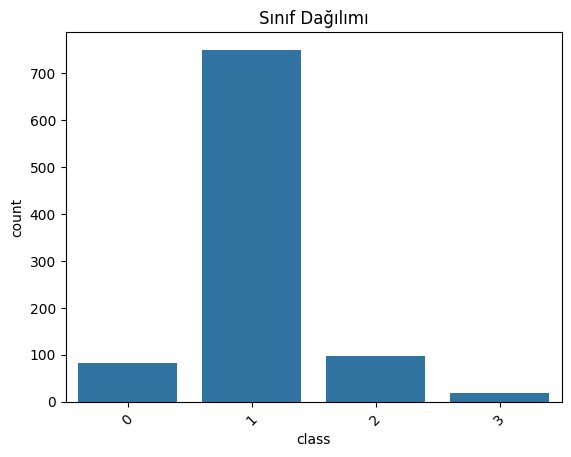

In [ ]:
sns.countplot(x='class', data=df)
plt.xticks(rotation=45)
plt.title("Sınıf Dağılımı")
plt.show()

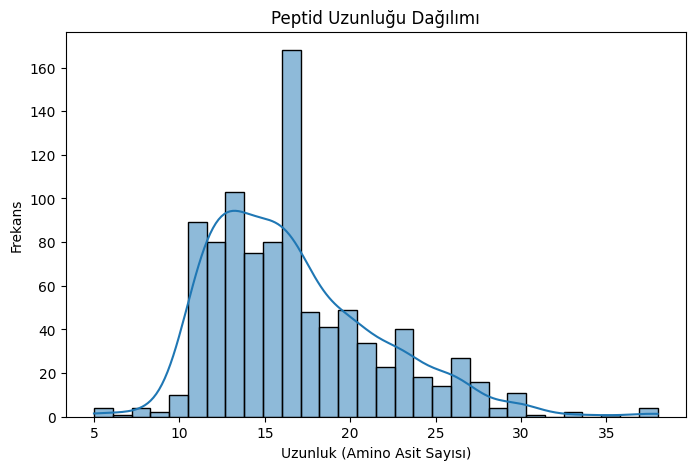

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['lenght'], kde=True, bins=30)
plt.title('Peptid Uzunluğu Dağılımı')
plt.xlabel('Uzunluk (Amino Asit Sayısı)')
plt.ylabel('Frekans')
plt.show()

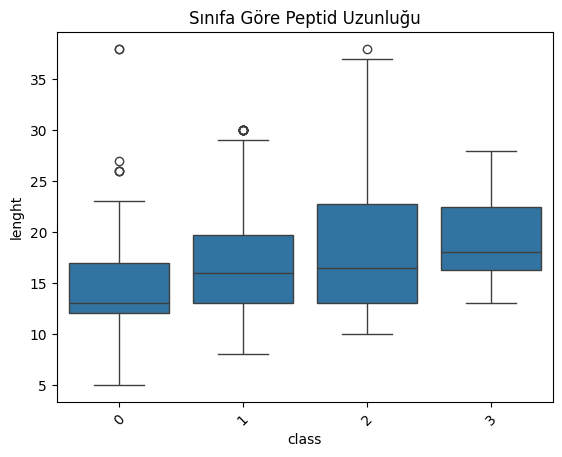

In [ ]:
sns.boxplot(x='class', y='lenght', data=df)
plt.xticks(rotation=45)
plt.title('Sınıfa Göre Peptid Uzunluğu')
plt.show()

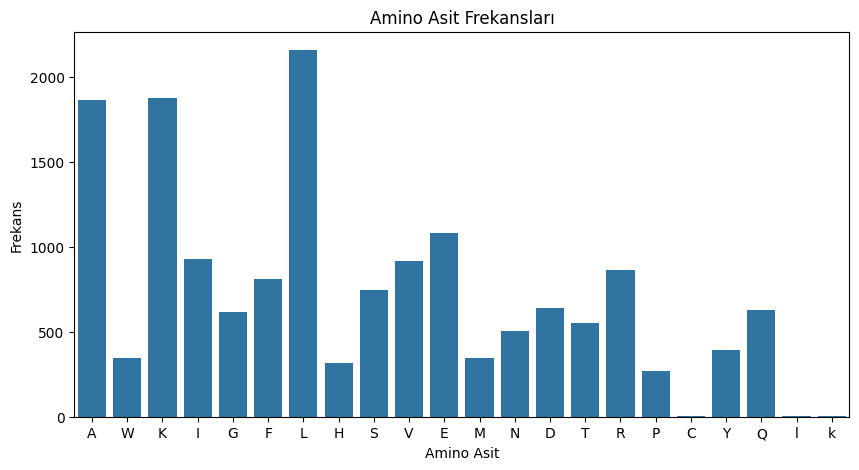

In [ ]:
from collections import Counter

# Tüm dizileri birleştir
all_aa = ''.join(df['sequence'])
aa_counts = Counter(all_aa)

# Görselleştir
plt.figure(figsize=(10, 5))
sns.barplot(x=list(aa_counts.keys()), y=list(aa_counts.values()))
plt.title('Amino Asit Frekansları')
plt.xlabel('Amino Asit')
plt.ylabel('Frekans')
plt.show()


In [ ]:
AMINO_ACIDS = 'ACDEFGHIKLMNPQRSTVWY'

def compute_aac(seq):
    seq = seq.upper()
    length = len(seq)
    count = Counter(seq)
    return [count[aa]/length for aa in AMINO_ACIDS]

aac_features = df['sequence'].apply(compute_aac)
aac_df = pd.DataFrame(aac_features.tolist(), columns=[f'AAC_{aa}' for aa in AMINO_ACIDS])

In [ ]:
aac_df

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,0.428571,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238095,0.000000
1,0.130435,0.0,0.000000,0.043478,0.130435,0.130435,0.043478,0.086957,0.173913,0.043478,0.043478,0.043478,0.000000,0.000000,0.000000,0.086957,0.000000,0.043478,0.000000,0.000000
2,0.380952,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000
3,0.083333,0.0,0.083333,0.166667,0.083333,0.000000,0.000000,0.000000,0.083333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000
4,0.166667,0.0,0.083333,0.166667,0.083333,0.000000,0.000000,0.000000,0.083333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.166667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,0.043478,0.0,0.043478,0.043478,0.000000,0.043478,0.043478,0.043478,0.173913,0.173913,0.043478,0.086957,0.000000,0.000000,0.086957,0.000000,0.043478,0.086957,0.000000,0.043478
945,0.000000,0.0,0.043478,0.086957,0.000000,0.043478,0.043478,0.086957,0.173913,0.173913,0.000000,0.000000,0.000000,0.000000,0.000000,0.130435,0.086957,0.043478,0.043478,0.043478
946,0.133333,0.0,0.066667,0.066667,0.000000,0.066667,0.000000,0.066667,0.000000,0.066667,0.066667,0.000000,0.066667,0.066667,0.066667,0.000000,0.133333,0.066667,0.000000,0.066667
947,0.187500,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.125000,0.062500,0.000000,0.062500,0.000000,0.187500,0.062500,0.000000,0.000000,0.125000,0.000000,0.125000


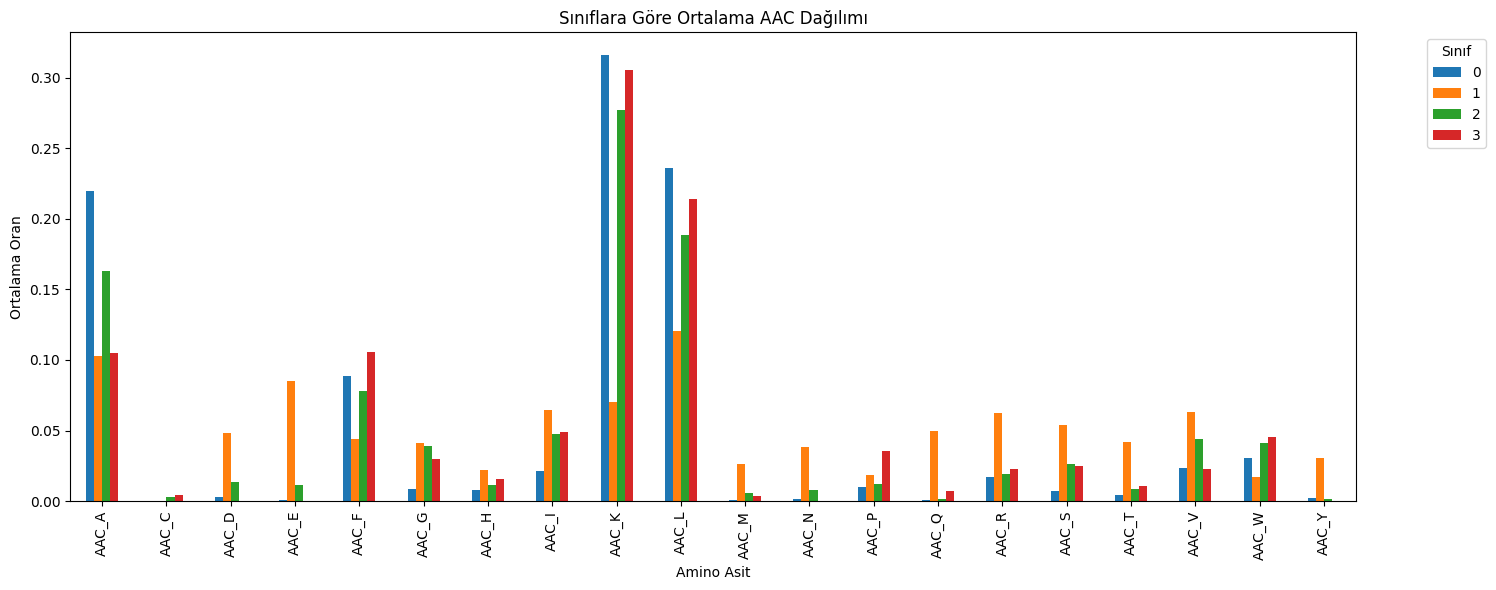

In [ ]:
# AAC'leri ve sınıf bilgisini birleştir
df_combined = pd.concat([aac_df, df['class']], axis=1)

# Ortalama AAC değerlerini sınıfa göre grupla
mean_aac = df_combined.groupby('class').mean().T

# Barplot (her amino asit için sınıflar)
mean_aac.plot(kind='bar', figsize=(15, 6))
plt.title('Sınıflara Göre Ortalama AAC Dağılımı')
plt.xlabel('Amino Asit')
plt.ylabel('Ortalama Oran')
plt.legend(title='Sınıf', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

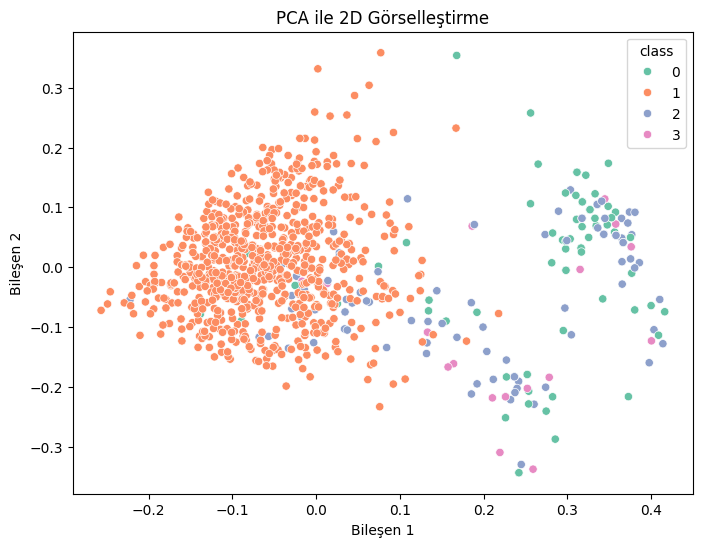

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(aac_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['class'], palette='Set2')
plt.title('PCA ile 2D Görselleştirme')
plt.xlabel('Bileşen 1')
plt.ylabel('Bileşen 2')
plt.show()


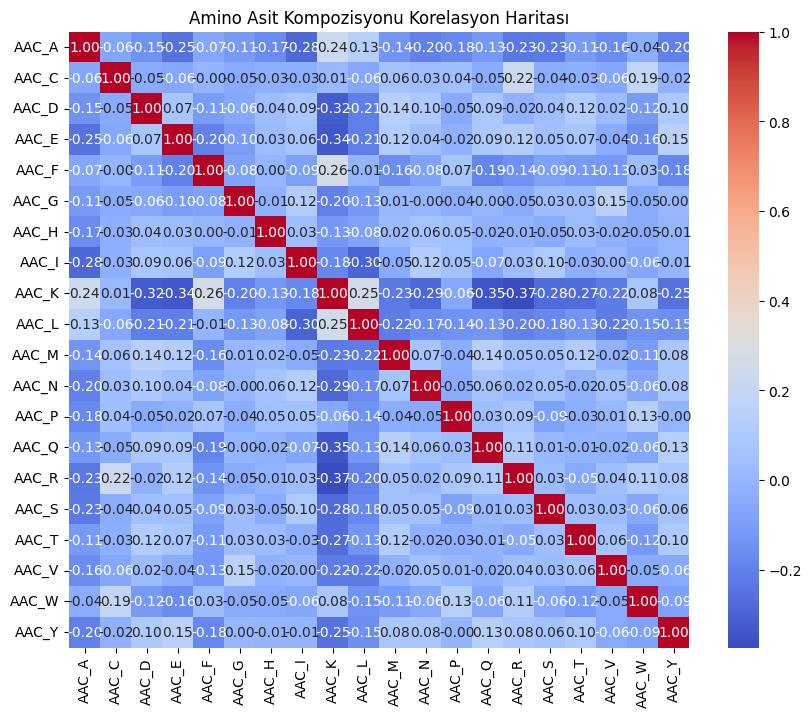

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(aac_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Amino Asit Kompozisyonu Korelasyon Haritası')
plt.show()


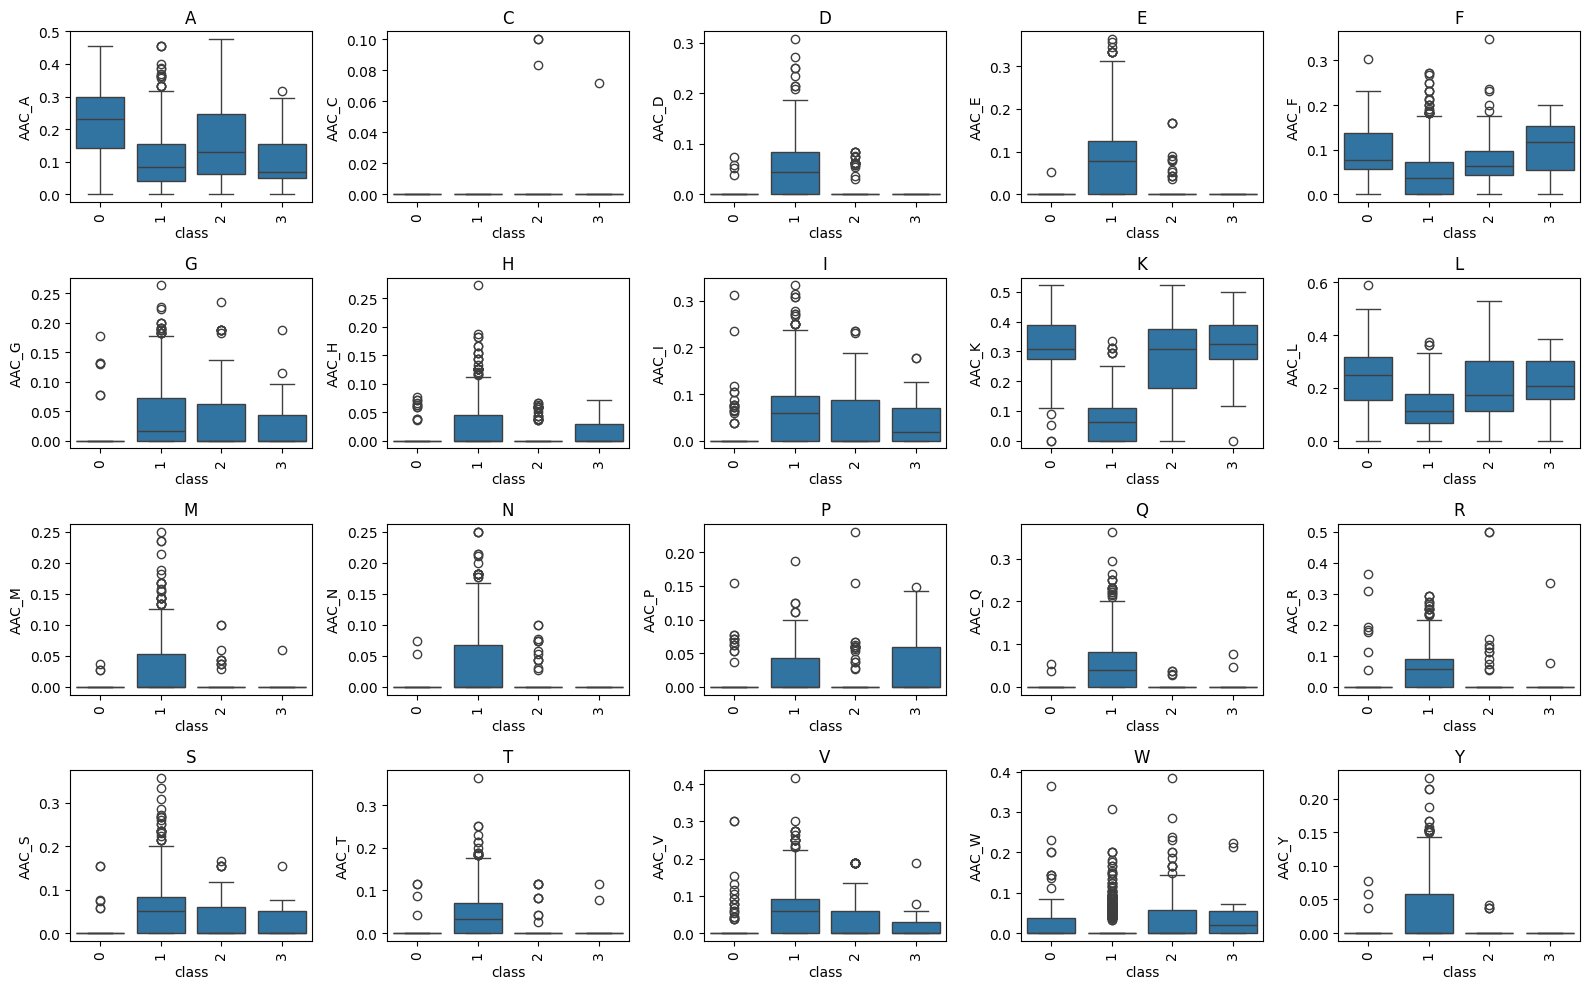

In [ ]:
plt.figure(figsize=(16, 10))
for i, aa in enumerate(AMINO_ACIDS):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x=df['class'], y=aac_df[f'AAC_{aa}'])
    plt.title(aa)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
aac_df

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,0.428571,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238095,0.000000
1,0.130435,0.0,0.000000,0.043478,0.130435,0.130435,0.043478,0.086957,0.173913,0.043478,0.043478,0.043478,0.000000,0.000000,0.000000,0.086957,0.000000,0.043478,0.000000,0.000000
2,0.380952,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000
3,0.083333,0.0,0.083333,0.166667,0.083333,0.000000,0.000000,0.000000,0.083333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000
4,0.166667,0.0,0.083333,0.166667,0.083333,0.000000,0.000000,0.000000,0.083333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.166667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,0.043478,0.0,0.043478,0.043478,0.000000,0.043478,0.043478,0.043478,0.173913,0.173913,0.043478,0.086957,0.000000,0.000000,0.086957,0.000000,0.043478,0.086957,0.000000,0.043478
945,0.000000,0.0,0.043478,0.086957,0.000000,0.043478,0.043478,0.086957,0.173913,0.173913,0.000000,0.000000,0.000000,0.000000,0.000000,0.130435,0.086957,0.043478,0.043478,0.043478
946,0.133333,0.0,0.066667,0.066667,0.000000,0.066667,0.000000,0.066667,0.000000,0.066667,0.066667,0.000000,0.066667,0.066667,0.066667,0.000000,0.133333,0.066667,0.000000,0.066667
947,0.187500,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.125000,0.062500,0.000000,0.062500,0.000000,0.187500,0.062500,0.000000,0.000000,0.125000,0.000000,0.125000


In [ ]:
df

,ID,sequence,class,lenght
0,1,AAWKWAWAKKWAKAKKWAKAA,2,21
1,2,AIGKFLHSAKKFGKAFVGEIMNS,2,23
2,3,AWKKWAKAWKWAKAKWWAKAA,2,21
3,4,ESFSDWWKLLAE,2,12
4,5,ETFADWWKLLAE,2,12
...,...,...,...,...
944,945,YLDKEVKLIKKMGNHLTNLRRVA,1,23
945,946,YLSESVETIKKLGDHITSLKKLW,1,23
946,947,YPIVDAAMRQLTETG,1,15
947,948,YQNIVKAVQYAARKLQ,1,16


In [ ]:
aac_df['class']=df['class']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
aac_df.iloc[:,:-1]

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,0.428571,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238095,0.000000
1,0.130435,0.0,0.000000,0.043478,0.130435,0.130435,0.043478,0.086957,0.173913,0.043478,0.043478,0.043478,0.000000,0.000000,0.000000,0.086957,0.000000,0.043478,0.000000,0.000000
2,0.380952,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000
3,0.083333,0.0,0.083333,0.166667,0.083333,0.000000,0.000000,0.000000,0.083333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000
4,0.166667,0.0,0.083333,0.166667,0.083333,0.000000,0.000000,0.000000,0.083333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.166667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,0.043478,0.0,0.043478,0.043478,0.000000,0.043478,0.043478,0.043478,0.173913,0.173913,0.043478,0.086957,0.000000,0.000000,0.086957,0.000000,0.043478,0.086957,0.000000,0.043478
945,0.000000,0.0,0.043478,0.086957,0.000000,0.043478,0.043478,0.086957,0.173913,0.173913,0.000000,0.000000,0.000000,0.000000,0.000000,0.130435,0.086957,0.043478,0.043478,0.043478
946,0.133333,0.0,0.066667,0.066667,0.000000,0.066667,0.000000,0.066667,0.000000,0.066667,0.066667,0.000000,0.066667,0.066667,0.066667,0.000000,0.133333,0.066667,0.000000,0.066667
947,0.187500,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.125000,0.062500,0.000000,0.062500,0.000000,0.187500,0.062500,0.000000,0.000000,0.125000,0.000000,0.125000


In [ ]:
x=aac_df.iloc[:,:-1]
y=aac_df['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = SVC(kernel='linear')  # veya 'rbf', 'poly', 'sigmoid'
model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print("Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred))

Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0       0.57      0.75      0.65        16
           1       0.95      0.99      0.97       157
           2       0.60      0.19      0.29        16
           3       0.00      0.00      0.00         1

    accuracy                           0.90       190
   macro avg       0.53      0.48      0.48       190
weighted avg       0.88      0.90      0.88       190



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


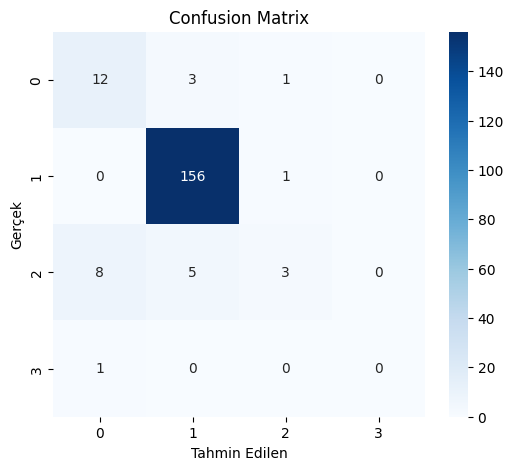

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)

plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
label1=pd.read_csv('/content/drive/MyDrive/ACP_Classification/acp740_376.csv')
label1

,data,label
0,GLWSKIKEVGKEAAKAAAKAAGKAALGAVSEAV,1
1,GLFDIIKKIAESI,1
2,GLLDIVKKVVGAFGSL,1
3,GLFDIVKKVVGALGSL,1
4,GLFDIVKKVVGTLAGL,1
...,...,...
371,CYSAAKYPGFQEFINRKYKSSRF,1
372,FLGGLMKAFPAIICAVTKKC,1
373,CGESCVFIPCISTLLGCSCKNKVCYRNGVIP,1
374,FLPIVTNLLSGLL,1


In [ ]:
label0=pd.read_csv('/content/drive/MyDrive/ACP_Classification/acp740Non_364.csv')
label0

,data,label
0,MTISLIWGIAMVVCCCIWVIFDRRRRKAGEPPL,0
1,MFATPLRQPTNASGARPAVSMDGQETPFQYEITD,0
2,LLWRKVAGATVGPGPVPA,0
3,DSPDPMNGASSNALIAKMNSAKLLYQHY,0
4,NNQEVIDAISQAISQTPGCVL,0
...,...,...
359,VRRFPWWWPFLRR,0
360,RRRRRRRRGEDIIRNIARHLAQVGDSMDR,0
361,VYINKLTPPCGTMYYACEAV,0
362,ACDCRGDCFCGGGGIVRRADRAAVP,0


In [ ]:
df1=pd.concat([label0,label1],ignore_index=True)
df1=df1.sample(frac=1).reset_index(drop=True)
df1

,data,label
0,FLVSIAGLLYALVQLGQPCDCLPPLRAAA,0
1,CYSAAKYPGFQEFINRKYKSSRF,1
2,FLPLIAGLAANFLPKIFCAITKKC,1
3,LLWRKVAGATVGPGPVPA,0
4,LGSGHHDGSGDSLEMSSLDRAQ,0
...,...,...
735,VIADDLPPTCIRP,0
736,FLPFLASLLSKVL,1
737,KVAPGGPTGYPGNLTAEQEQKLGELKMILL,0
738,LLGDFKRIVQRIKDF,0


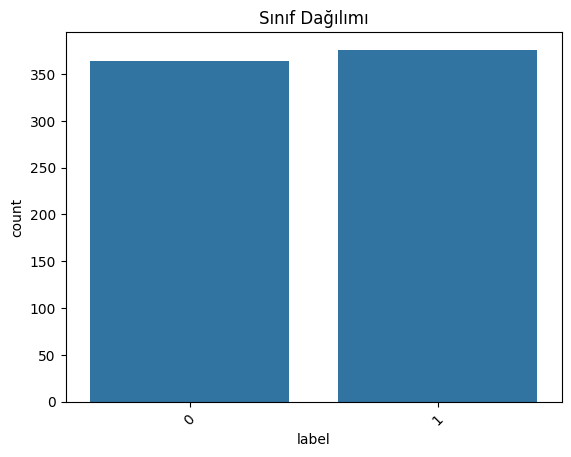

In [ ]:
sns.countplot(x='label', data=df1)
plt.xticks(rotation=45)
plt.title("Sınıf Dağılımı")
plt.show()

In [ ]:
df1['lenght']=df1['data'].apply(len)
df1

,data,label,lenght
0,FLVSIAGLLYALVQLGQPCDCLPPLRAAA,0,29
1,CYSAAKYPGFQEFINRKYKSSRF,1,23
2,FLPLIAGLAANFLPKIFCAITKKC,1,24
3,LLWRKVAGATVGPGPVPA,0,18
4,LGSGHHDGSGDSLEMSSLDRAQ,0,22
...,...,...,...
735,VIADDLPPTCIRP,0,13
736,FLPFLASLLSKVL,1,13
737,KVAPGGPTGYPGNLTAEQEQKLGELKMILL,0,30
738,LLGDFKRIVQRIKDF,0,15


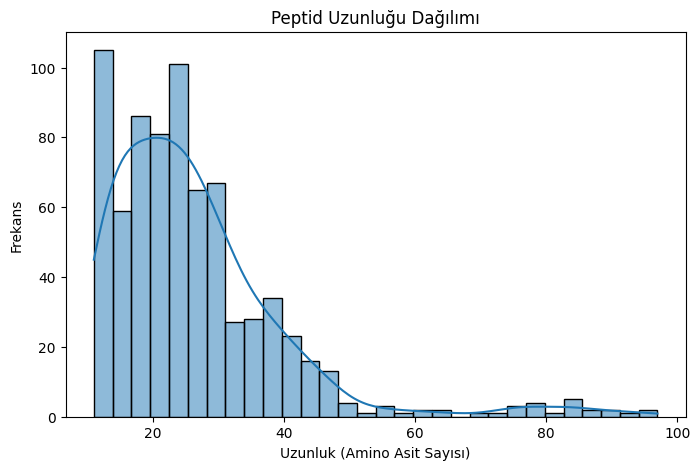

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df1['lenght'], kde=True, bins=30)
plt.title('Peptid Uzunluğu Dağılımı')
plt.xlabel('Uzunluk (Amino Asit Sayısı)')
plt.ylabel('Frekans')
plt.show()

In [ ]:
AMINO_ACIDS = 'ACDEFGHIKLMNPQRSTVWY'

def compute_aac(seq):
    seq = seq.upper()
    length = len(seq)
    count = Counter(seq)
    return [count[aa]/length for aa in AMINO_ACIDS]

aac_features = df1['data'].apply(compute_aac)
aac_df1 = pd.DataFrame(aac_features.tolist(), columns=[f'AAC_{aa}' for aa in AMINO_ACIDS])

In [ ]:
aac_df1

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,0.172414,0.068966,0.034483,0.000000,0.034483,0.068966,0.000000,0.034483,0.000000,0.241379,0.000000,0.000000,0.103448,0.068966,0.034483,0.034483,0.000000,0.068966,0.000000,0.034483
1,0.086957,0.043478,0.000000,0.043478,0.130435,0.043478,0.000000,0.043478,0.130435,0.000000,0.000000,0.043478,0.043478,0.043478,0.086957,0.130435,0.000000,0.000000,0.000000,0.130435
2,0.166667,0.083333,0.000000,0.000000,0.125000,0.041667,0.000000,0.125000,0.125000,0.166667,0.000000,0.041667,0.083333,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000
3,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.055556,0.111111,0.000000,0.000000,0.166667,0.000000,0.055556,0.000000,0.055556,0.166667,0.055556,0.000000
4,0.045455,0.000000,0.136364,0.045455,0.000000,0.181818,0.090909,0.000000,0.000000,0.136364,0.045455,0.000000,0.000000,0.045455,0.045455,0.227273,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.076923,0.076923,0.153846,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.230769,0.000000,0.076923,0.000000,0.076923,0.076923,0.000000,0.000000
736,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.076923,0.384615,0.000000,0.000000,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000
737,0.066667,0.000000,0.000000,0.100000,0.000000,0.166667,0.000000,0.033333,0.100000,0.166667,0.033333,0.033333,0.100000,0.066667,0.000000,0.000000,0.066667,0.033333,0.000000,0.033333
738,0.000000,0.000000,0.133333,0.000000,0.133333,0.066667,0.000000,0.133333,0.133333,0.133333,0.000000,0.000000,0.000000,0.066667,0.133333,0.000000,0.000000,0.066667,0.000000,0.000000


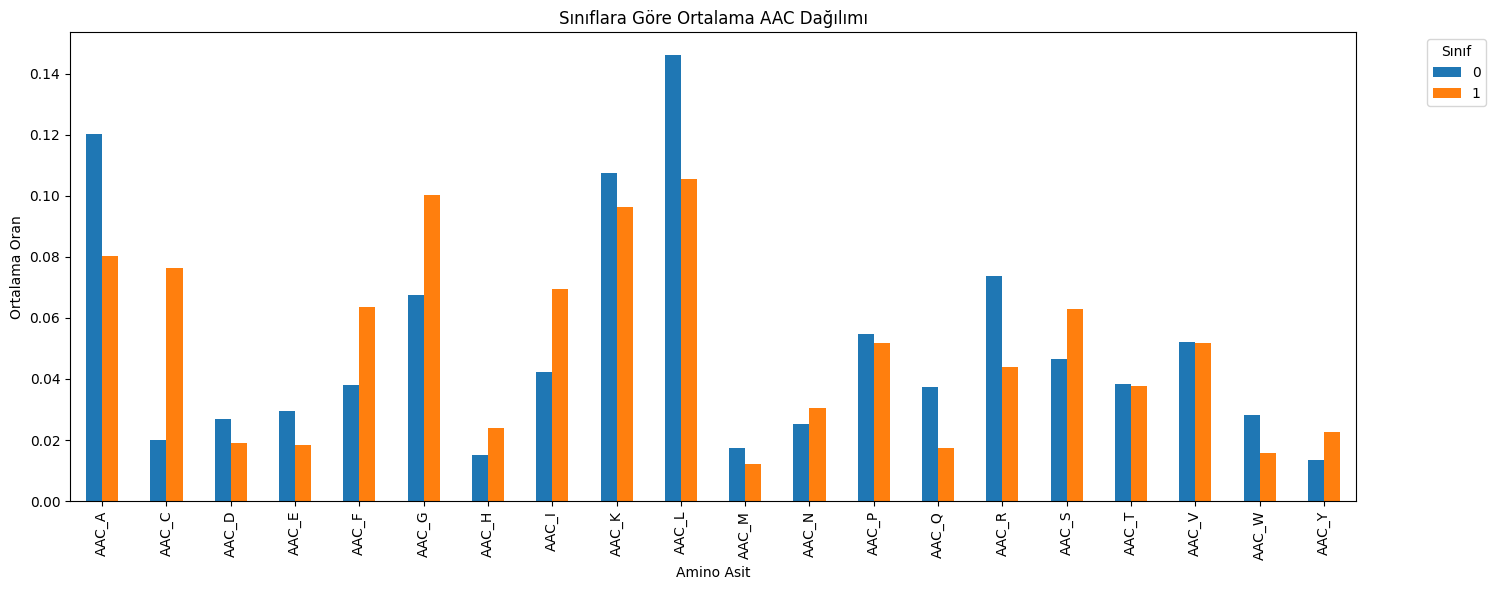

In [ ]:
# AAC'leri ve sınıf bilgisini birleştir
df_combined = pd.concat([aac_df1, df1['label']], axis=1)

# Ortalama AAC değerlerini sınıfa göre grupla
mean_aac = df_combined.groupby('label').mean().T

# Barplot (her amino asit için sınıflar)
mean_aac.plot(kind='bar', figsize=(15, 6))
plt.title('Sınıflara Göre Ortalama AAC Dağılımı')
plt.xlabel('Amino Asit')
plt.ylabel('Ortalama Oran')
plt.legend(title='Sınıf', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
aac_df1['class']=df1['label']
aac_df1

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,0.035714,0.000000,0.000000,0.000000,0.000000,0.178571,0.000000,0.214286,0.107143,0.107143,...,0.000000,0.071429,0.000000,0.142857,0.035714,0.000000,0.035714,0.035714,0.035714,1
1,0.086957,0.130435,0.021739,0.043478,0.000000,0.086957,0.021739,0.065217,0.065217,0.043478,...,0.000000,0.000000,0.021739,0.173913,0.108696,0.065217,0.000000,0.043478,0.021739,1
2,0.142857,0.000000,0.071429,0.000000,0.000000,0.071429,0.000000,0.035714,0.142857,0.107143,...,0.107143,0.000000,0.035714,0.000000,0.000000,0.071429,0.142857,0.035714,0.000000,0
3,0.166667,0.000000,0.111111,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.055556,...,0.000000,0.055556,0.111111,0.000000,0.000000,0.166667,0.111111,0.000000,0.000000,0
4,0.200000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.200000,0.100000,0.100000,...,0.000000,0.050000,0.000000,0.000000,0.050000,0.050000,0.050000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.121212,0.060606,0.030303,0.000000,0.090909,0.060606,0.000000,0.000000,0.121212,0.181818,...,0.090909,0.000000,0.000000,0.000000,0.121212,0.060606,0.060606,0.000000,0.000000,1
736,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.038462,0.038462,0.269231,0.230769,...,0.000000,0.000000,0.000000,0.000000,0.153846,0.115385,0.038462,0.038462,0.000000,0
737,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.083333,0.166667,0.083333,0.166667,...,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.083333,0.000000,1
738,0.080000,0.000000,0.000000,0.040000,0.000000,0.080000,0.120000,0.040000,0.040000,0.200000,...,0.000000,0.080000,0.000000,0.000000,0.080000,0.000000,0.240000,0.000000,0.000000,1


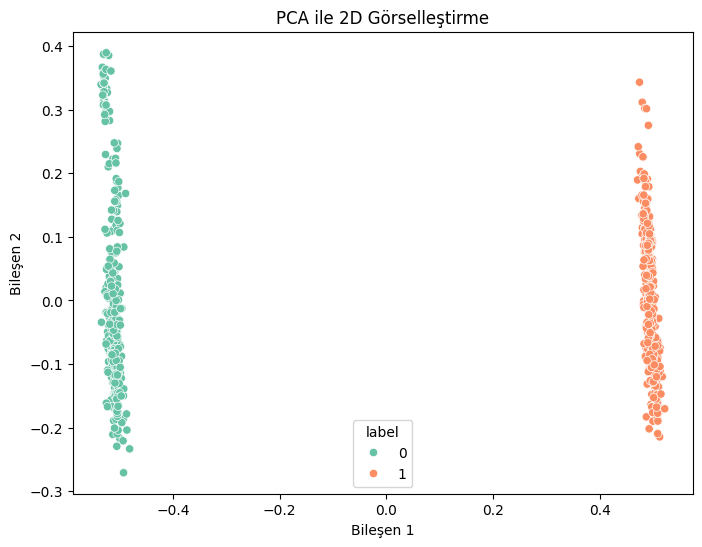

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(aac_df1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df1['label'], palette='Set2')
plt.title('PCA ile 2D Görselleştirme')
plt.xlabel('Bileşen 1')
plt.ylabel('Bileşen 2')
plt.show()


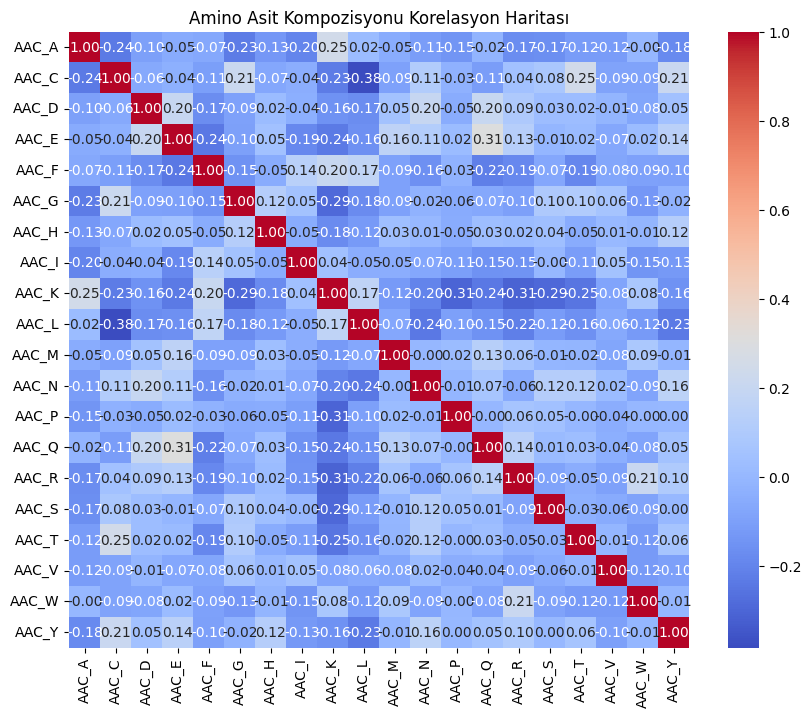

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(aac_df1.iloc[:,:-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Amino Asit Kompozisyonu Korelasyon Haritası')
plt.show()


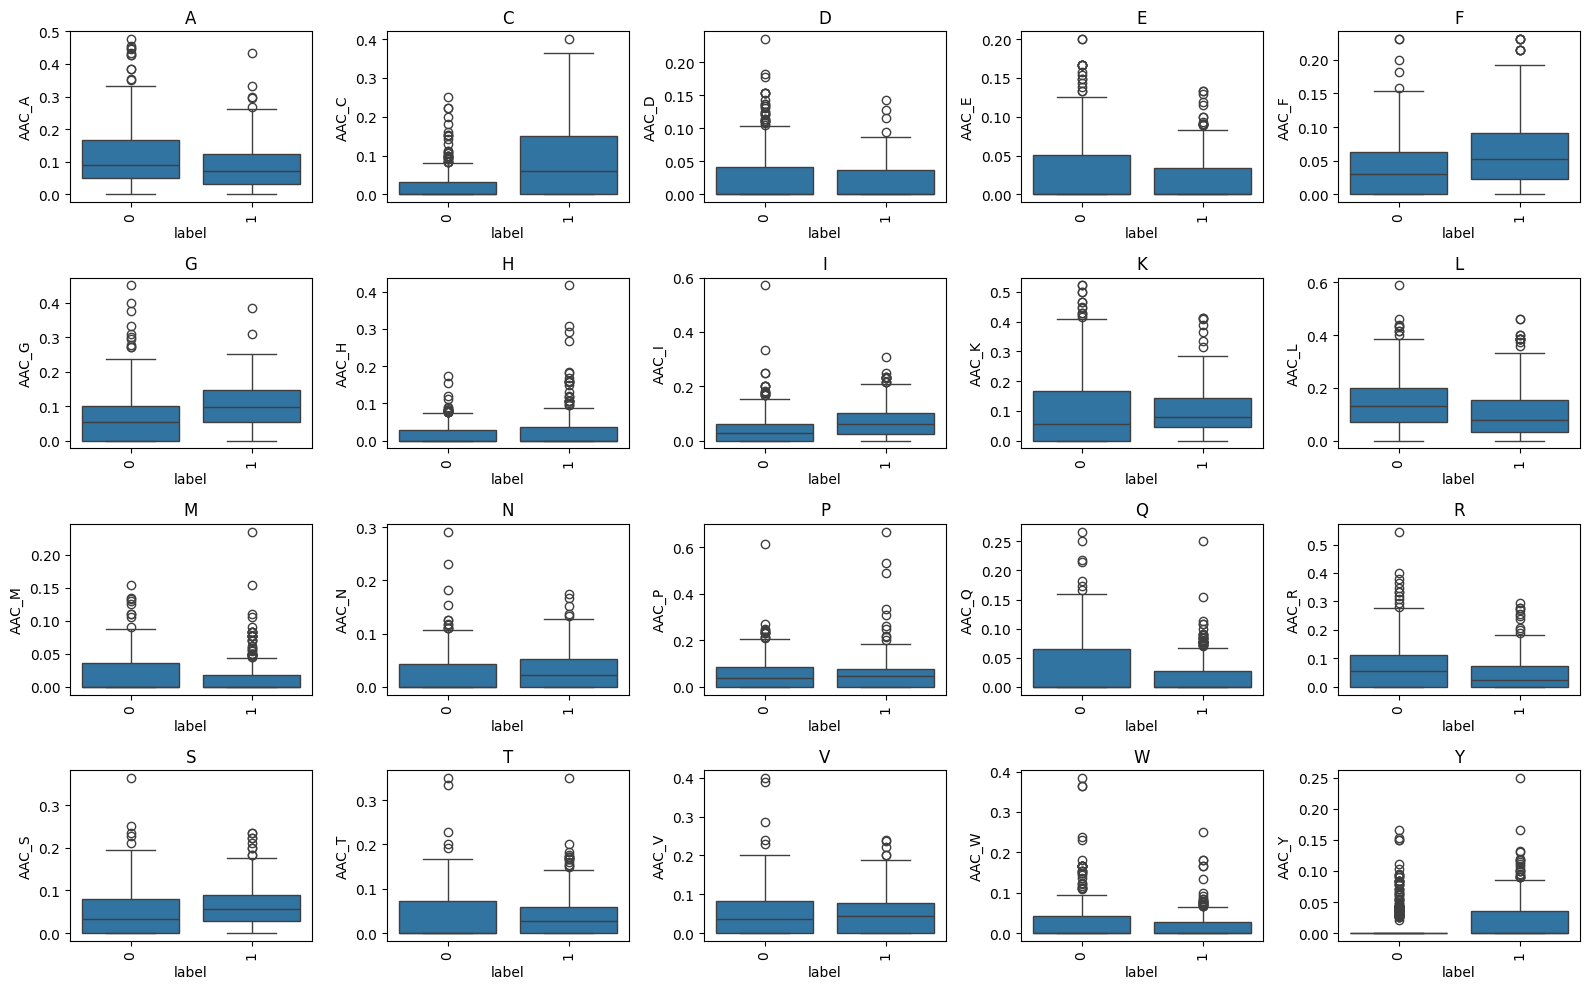

In [ ]:
plt.figure(figsize=(16, 10))
for i, aa in enumerate(AMINO_ACIDS):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x=df1['label'], y=aac_df1[f'AAC_{aa}'])
    plt.title(aa)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
x=aac_df1.iloc[:,:-1]
y=aac_df1['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = SVC(kernel='linear')  # veya 'rbf', 'poly', 'sigmoid'
model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print("Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred))

Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        76
           1       0.77      0.88      0.82        72

    accuracy                           0.81       148
   macro avg       0.82      0.81      0.81       148
weighted avg       0.82      0.81      0.81       148



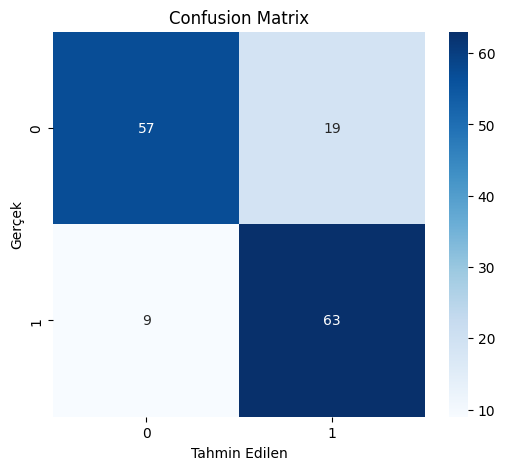

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)

plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from transformers import BertModel, BertTokenizer
import torch
from tqdm import tqdm

tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")

def get_embedding(seq):
    seq = ' '.join(list(seq))  # ProtBERT için boşluklu format
    ids = tokenizer(seq, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        output = model(**ids)
    embedding = output.last_hidden_state[:, 1:-1, :].mean(dim=1).squeeze().numpy()
    return embedding


In [ ]:
embeddings = []

for seq in tqdm(df1['data']):
    emb = get_embedding(seq)
    embeddings.append(emb)

100%|██████████| 740/740 [09:08<00:00,  1.35it/s]


In [ ]:
import numpy as np

In [ ]:
# Burada vstack ile diziyi uygun shape'e getir
x_bert = np.array(embeddings)           # (740, 1024)
x_bert = np.expand_dims(x_bert, axis=-1) # (740, 1024, 1)


In [ ]:

x_aac = aac_df1.values                            # (n_samples, 20)
x_aac = np.expand_dims(x_aac, axis=-1)           # LSTM için → (n_samples, 20, 1)

In [ ]:
# Etiketler
y = df1['label'].values

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Flatten, LSTM, Dense, Concatenate, Dropout

# BERT Embedding - CNN'e girecek
input_bert = Input(shape=(1024, 1), name='bert_input')
x1 = Conv1D(64, kernel_size=5, activation='relu')(input_bert)
x1 = Conv1D(32, kernel_size=3, activation='relu')(x1)
x1 = Flatten()(x1)

# AAC - LSTM'e girecek
input_aac = Input(shape=(20, 1), name='aac_input')
x2 = LSTM(64)(input_aac)

# Birleştirme
combined = Concatenate()([x1, x2])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.3)(combined)
output = Dense(1, activation='sigmoid')(combined)

model = Model(inputs=[input_bert, input_aac], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ bert_input          │ (None, 1024, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 1020, 64)  │        384 │ bert_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 1018, 32)  │      6,176 │ conv1d_14[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aac_input           │ (None, 20, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 32576)     │          0 │ conv1d_15[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 64)        │     16,896 │ aac_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 32640)     │          0 │ flatten_7[0][0],  │
│ (Concatenate)       │                   │            │ lstm_7[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 64)        │  2,089,024 │ concatenate_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │         65 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,112,545 (8.06 MB)

 Trainable params: 2,112,545 (8.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(x_bert.shape)
print(type(x_bert))
print(x_bert.dtype)


(740, 1024, 1)
<class 'numpy.ndarray'>
float32


In [ ]:
print(x_aac.shape)
print(type(x_aac))
print(x_aac.dtype)


(740, 20, 1)
<class 'numpy.ndarray'>
float64


In [ ]:
from sklearn.model_selection import train_test_split

# Aynı şekilde ayır
x_bert_train, x_bert_test, x_aac_train, x_aac_test, y_train, y_test = train_test_split(
    x_bert, x_aac, y, test_size=0.2, random_state=42, stratify=y
)

# Modeli yeniden eğit
model.fit([x_bert_train, x_aac_train], y_train, batch_size=32, epochs=20, validation_data=([x_bert_test, x_aac_test], y_test))


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.6183 - loss: 0.6529 - val_accuracy: 0.8041 - val_loss: 0.4833
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.7650 - loss: 0.4884 - val_accuracy: 0.8176 - val_loss: 0.4244
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.8102 - loss: 0.4084 - val_accuracy: 0.8514 - val_loss: 0.3931
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.8295 - loss: 0.4038 - val_accuracy: 0.8378 - val_loss: 0.3603
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.8258 - loss: 0.4005 - val_accuracy: 0.8649 - val_loss: 0.3492
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.8516 - loss: 0.3532 - val_accuracy: 0.8649 - val_loss: 0.3482
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8805 - loss: 0.2939 - val_accuracy: 0.8716 - val_loss: 0.3344
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8687 - loss: 0.3132 - val_accuracy: 0.864

In [ ]:
y_pred_proba = model.predict([x_bert_test, x_aac_test])  # Tahmin olasılığı (0-1 arası)
y_pred = (y_pred_proba > 0.5).astype(int)                 # Threshold uygulanarak sınıf tahmini

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8986486486486487
F1 Score: 0.9019607843137255
Precision: 0.8846153846153846
Recall: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90        73
           1       0.88      0.92      0.90        75

    accuracy                           0.90       148
   macro avg       0.90      0.90      0.90       148
weighted avg       0.90      0.90      0.90       148



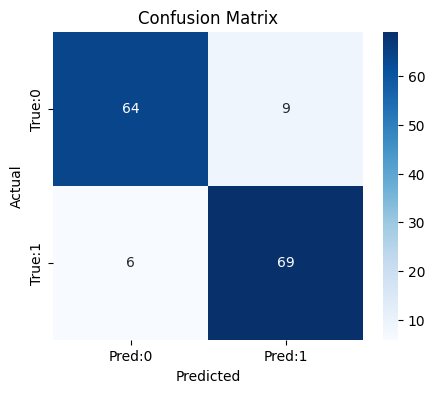

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred:0", "Pred:1"], yticklabels=["True:0", "True:1"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
print(np.linalg.norm(x_bert[0] - x_bert[1]))  # ~0 ise aynı demektir


1.7461679


In [ ]:
# 3. boyut 1 olduğu için kaldır
x_bert_2d = x_bert.squeeze(-1)  # (n_samples, 1024)
# Pandas DataFrame yap
df_bert = pd.DataFrame(x_bert_2d)
x_aac_2d = x_aac.squeeze(-1)  # (n_samples, 20)

df_aac = pd.DataFrame(x_aac_2d)
df_aac.to_csv('/content/drive/MyDrive/ACP_Classification/x_aac.csv', index=False)
df_bert.to_csv('/content/drive/MyDrive/ACP_Classification/x_bert.csv', index=False)